# Business Understanding

This dataset tells the characteristics of individuals who were classified as having heart disease or not using 14 variables. With a very excellent model performance based on the magnitude of the recall measure, the best model output may be utilized as a basis for detecting patients in the future, whether they are discovered to have heart disease or not. The model will be created using the Random Forest and Decision Tree algorithms.

# Data Understanding

Here are the descripstion of each variables:
1. age: patient age 
2. sex: patient sex (1 = male, 0 = female) 
3. cp: chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) 
4. trestbps: resting blood pressure (in mm Hg) 
5. chol: serum cholestoral in mg/dl 
6. fbs: fasting blood sugar > 120 mg/dl (1 = yes, 0 = no)
7. restecg: resting electrocardiographic results (0 = normal, 1 = abnormality, 2 = probable)
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes, 0 = no) 
10. oldpeak: ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: display thalessemia 
14. target: (0 = heart disease, 1 = no heart disease) 

# Data Preparation

## Import Library
Here are the libraries that will be used in data preprocessing & building machine learning models.

In [1]:
# Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from scipy import stats
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature Engineering
from sklearn.preprocessing import StandardScaler

# Split Dataset
from sklearn.model_selection import train_test_split

# Fit Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Fit Random Forest
from sklearn.ensemble import RandomForestClassifier

# Hyperparameters Tuning Using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Evaluation Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import Dataset
The dataset is in .csv format.

In [2]:
data = pd.read_csv("/kaggle/input/heart-dataset/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


**Insight:**

As shown in the output, we have 1024 observations with 14 features each.

## Check Data Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Insight:**

Only 'oldpeak' feature is having float type!

## Check Missing Value
Let's see wether the dataset consist of missing values.

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Insight:**

Cool!!! Our dataset has no missing value. So, we don't need any missing value imputation steps.

## Check Duplicate

In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [6]:
ind = np.where(data.duplicated())
ind

(array([  15,   31,   43,   55,   61,   64,   79,   82,   83,   84,   86,
          92,   93,  103,  112,  115,  118,  120,  121,  127,  130,  132,
         133,  134,  136,  138,  150,  153,  155,  157,  162,  164,  165,
         176,  178,  180,  186,  187,  188,  192,  195,  200,  201,  202,
         204,  206,  207,  208,  209,  211,  213,  214,  217,  219,  221,
         222,  223,  226,  229,  230,  235,  236,  238,  241,  242,  243,
         246,  247,  249,  250,  251,  253,  257,  259,  261,  263,  264,
         265,  266,  272,  273,  275,  277,  278,  283,  284,  285,  289,
         290,  293,  294,  295,  296,  298,  302,  303,  306,  307,  308,
         310,  311,  312,  314,  315,  316,  317,  318,  324,  325,  326,
         329,  330,  335,  336,  338,  340,  341,  344,  345,  346,  347,
         350,  351,  352,  354,  357,  359,  360,  362,  364,  365,  370,
         371,  372,  375,  378,  379,  381,  383,  385,  386,  387,  388,
         390,  392,  393,  394,  395, 

**Insight:**

So many duplicate observations in our dataset. So, let's remove all of them.

In [7]:
data1 = data.drop_duplicates()
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


**Insight:**

After removing duplicate values, our dataset now consist of 301 observations.

## Check Outliers

Next step, let's check the outliers. The outliers checking is for numerical features [age, trestbps, chol, thalach, oldpeak, ca, and thal] only using z standarization.

In [8]:
z = np.abs(stats.zscore(data1[['age','trestbps','chol','thalach','oldpeak','ca','thal']]))
print(z)

          age  trestbps      chol   thalach   oldpeak        ca      thal
0    0.267966  0.376556  0.667728  0.806035  0.037124  1.274980  1.119967
1    0.157260  0.478910  0.841918  0.237495  1.773958  0.714911  1.119967
2    1.724733  0.764066  1.403197  1.074521  1.342748  0.714911  1.119967
3    0.728383  0.935159  0.841918  0.499898  0.899544  0.280034  1.119967
4    0.839089  0.364848  0.919336  1.905464  0.739054  2.269926  0.513994
..        ...       ...       ...       ...       ...       ...       ...
723  1.503322  0.661712  0.687083  1.511859  0.394086  0.714911  0.513994
733  1.153610  1.346085  2.041893  1.112172  0.382092  0.714911  0.513994
739  0.267966  0.205463  0.164513  0.499898  0.899544  0.280034  1.119967
843  0.506972  1.619532  0.512893  1.074521  0.899544  0.714911  0.513994
878  0.046555  0.661712  1.132235  1.599327  0.307844  0.280034  1.119967

[302 rows x 7 columns]


In [9]:
threshold = 3
print(np.where(z > 3))

(array([ 14,  49,  51,  63, 104, 108, 124, 128, 142, 144, 188, 212, 227,
       260, 269]), array([6, 5, 4, 4, 2, 5, 1, 2, 1, 2, 3, 6, 5, 2, 5]))


**Insight:**

Those are the observations that indicated as outliers. So, let's remove all of them.

In [10]:
data2 = data1[(z < 3).all(axis=1)]
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


**Insight:**

After removing the outliers, our dataset now consist of 286 observations.

## Check Data Imbalance
The next stage of Data Preparation is checking Data Imbalance. This check is performed on the target variable. This needs to be done because if the target variable data is not balance, it can affect the accuracy of the classification results.

In [11]:
y_ = data2['target']
x_ = data2.drop('target', axis=1)

<AxesSubplot: xlabel='index', ylabel='target'>

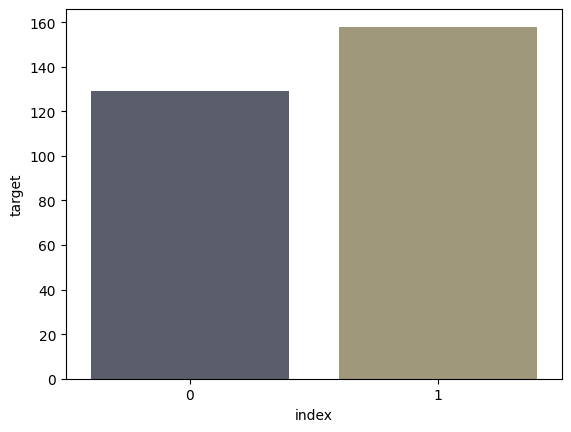

In [12]:
xx = data2['target'].value_counts().reset_index()
sns.barplot(x = "index", y = "target", data = xx, palette = 'cividis')

**Insight:**

The output above shows that the categories of the target variable (1 = heart disease, 0 = no heart disease) are not fully balanced (50:50). However, the difference is not that great. Thus, it is not necessary to handle imbalanced data.

## Decsriptive Statistics
After the data is considered clean in the previous Data Preparation stage, the next step is to examine the descriptive statistics of the data that has been cleaned. The clean data is named 'data2'.

In [13]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.334495,0.689895,0.972125,131.024390,244.501742,0.142857,0.533101,149.804878,0.327526,1.004878,1.411150,0.658537,2.313589,0.550523
std,9.093125,0.463344,1.037373,16.991856,45.920719,0.350538,0.527017,22.550570,0.470131,1.080684,0.607311,0.924675,0.584703,0.498310
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


**Insight:**

The descriptive statistics above show that the variables [age, tresbps, chol, and thalach] have a fairly large range due to the considerable difference in the max and min values.

## Correlation
Let's see the correlation of each features on the target feature using Spearman Correlation.

In [14]:
correlation=data2.corr('spearman')
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.072653,-0.081270,0.305326,0.173376,0.127242,-0.120855,-0.400414,0.109087,0.247576,-0.170819,0.392071,0.074372,-0.242215
sex,-0.072653,1.000000,-0.068989,-0.040717,-0.123255,0.058432,-0.099196,-0.055246,0.146867,0.147242,-0.044954,0.140431,0.284911,-0.302926
cp,-0.081270,-0.068989,1.000000,0.048678,-0.091024,0.113181,0.062173,0.313205,-0.406803,-0.129777,0.121677,-0.234311,-0.194014,0.436242
trestbps,0.305326,-0.040717,0.048678,1.000000,0.130814,0.148502,-0.113506,-0.053359,0.051408,0.148048,-0.082514,0.047390,0.036541,-0.105524
chol,0.173376,-0.123255,-0.091024,0.130814,1.000000,0.001142,-0.128050,-0.052056,0.091050,0.021421,-0.005679,0.127102,0.054486,-0.116170
fbs,0.127242,0.058432,0.113181,0.148502,0.001142,1.000000,-0.069971,-0.006491,-0.009093,0.019646,-0.032509,0.135116,-0.000822,-0.011438
restecg,-0.120855,-0.099196,0.062173,-0.113506,-0.128050,-0.069971,1.000000,0.089033,-0.079105,-0.062419,0.111071,-0.094153,0.016379,0.141893
thalach,-0.400414,-0.055246,0.313205,-0.053359,-0.052056,-0.006491,0.089033,1.000000,-0.402875,-0.428884,0.426769,-0.306806,-0.166110,0.432858
exang,0.109087,0.146867,-0.406803,0.051408,0.091050,-0.009093,-0.079105,-0.402875,1.000000,0.292059,-0.259240,0.186467,0.250364,-0.429082
oldpeak,0.247576,0.147242,-0.129777,0.148048,0.021421,0.019646,-0.062419,-0.428884,0.292059,1.000000,-0.574742,0.250377,0.230217,-0.411032


In [15]:
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.436242
thalach     0.432858
slope       0.352755
restecg     0.141893
fbs        -0.011438
trestbps   -0.105524
chol       -0.116170
age        -0.242215
sex        -0.302926
thal       -0.399860
oldpeak    -0.411032
exang      -0.429082
ca         -0.495302
Name: target, dtype: float64


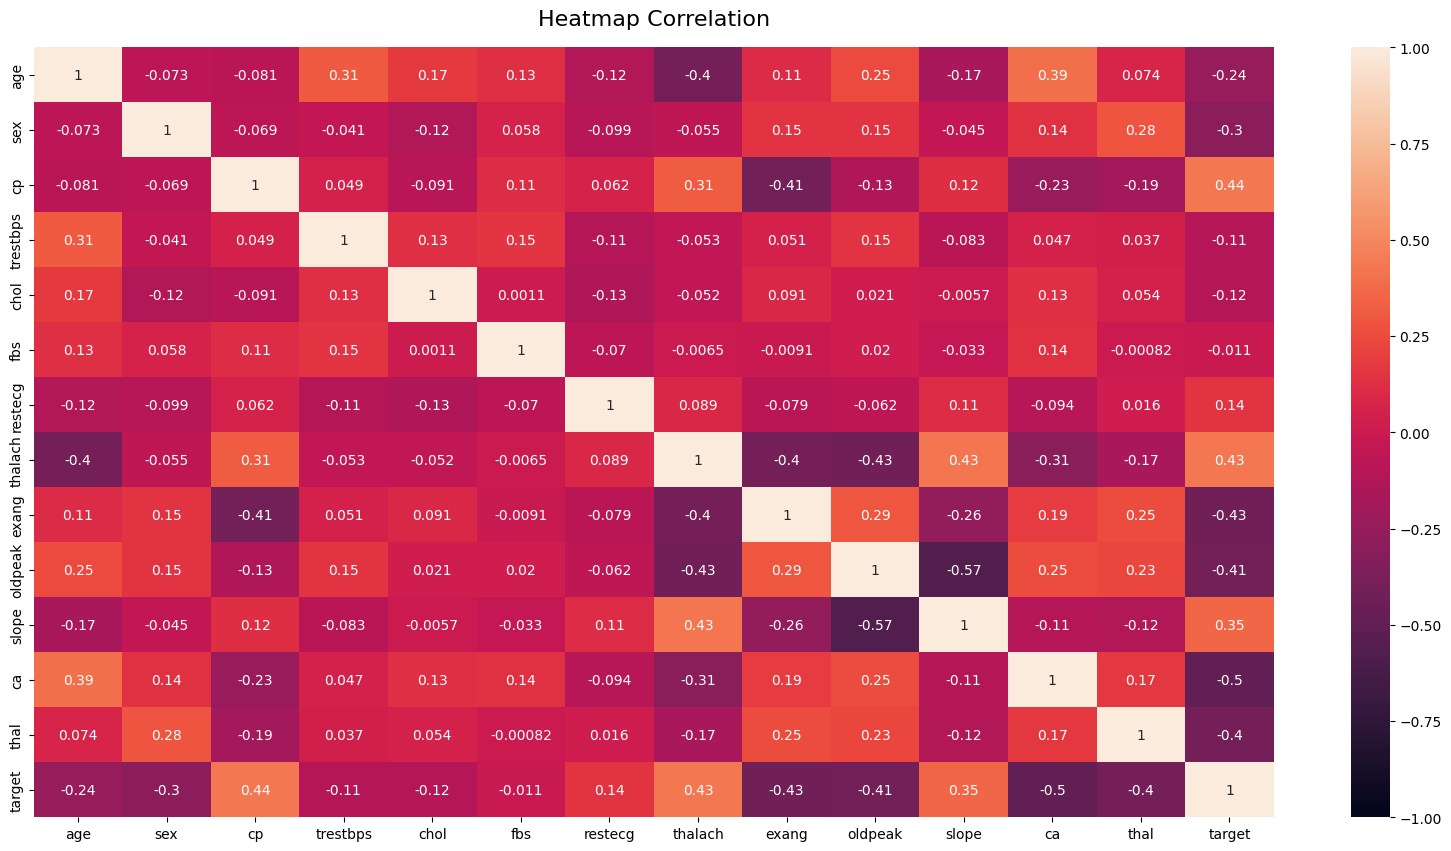

In [16]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data2.corr('spearman'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap Correlation', fontdict={'fontsize':16}, pad=16);

**Insight:**

Based on the output above, it can be seen that many variables have a low correlation. The [ca] variable is the variable that has the highest correlation with the target variable with a negative correlation.

## Feature Selection
Before we go further into modelling stage, let's select the best features that have greatest contribution to the target feature.

In [17]:
x=data2.drop('target',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [18]:
y=data2['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 287, dtype: int64

In [19]:
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(x,y)
scores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,scores],axis=1)
featureScores.columns = ['Label','Score'] 
featureScores.sort_values(by='Score',ascending=False)

,Label,Score
7,thalach,180.781981
11,ca,79.690982
9,oldpeak,59.880916
2,cp,52.850220
8,exang,35.533544
4,chol,24.577945
0,age,22.377490
3,trestbps,8.966825
1,sex,8.167010
10,slope,7.844517


**Insight:**

Because [restecg and fbs] features have the lowest contribution score to the target feature, we will drop those 2 features from our datastet.

In [20]:
data2.drop(['fbs','restecg'],axis=1,inplace=True)

/tmp/ipykernel_20/3327998995.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
data2

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,168,0,1.0,2,2,3,0
1,53,1,0,140,203,155,1,3.1,0,0,3,0
2,70,1,0,145,174,125,1,2.6,0,0,3,0
3,61,1,0,148,203,161,0,0.0,2,1,3,0
4,62,0,0,138,294,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,115,0,1.5,1,0,2,1
733,44,0,2,108,141,175,0,0.6,1,0,2,1
739,52,1,0,128,255,161,1,0.0,2,1,3,0
843,59,1,3,160,273,125,0,0.0,2,0,2,0


**Insight:**

Now, our dataset consist of 12 features after removing the [restecg and fbs] features.

## Feature Engineering
The next stage is to categorize the [sex, cp, exang, and slope] features with one-hot encoding. In addition, standardization is carried out on all numeric variables.

In [22]:
new_sex=pd.get_dummies(data=data2['sex'],prefix='sex')
new_cp=pd.get_dummies(data2['cp'],prefix='chestPain')
new_exang=pd.get_dummies(data2['exang'],prefix='exang')
new_slope=pd.get_dummies(data2['slope'],prefix='slope')

In [23]:
app=[data2,new_sex,new_cp,new_exang,new_slope]
data3=pd.concat(app,axis=1)
data3

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,...,sex_1,chestPain_0,chestPain_1,chestPain_2,chestPain_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,1,0,125,212,168,0,1.0,2,2,...,1,1,0,0,0,1,0,0,0,1
1,53,1,0,140,203,155,1,3.1,0,0,...,1,1,0,0,0,0,1,1,0,0
2,70,1,0,145,174,125,1,2.6,0,0,...,1,1,0,0,0,0,1,1,0,0
3,61,1,0,148,203,161,0,0.0,2,1,...,1,1,0,0,0,1,0,0,0,1
4,62,0,0,138,294,106,0,1.9,1,3,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,115,0,1.5,1,0,...,0,0,0,1,0,1,0,0,1,0
733,44,0,2,108,141,175,0,0.6,1,0,...,0,0,0,1,0,1,0,0,1,0
739,52,1,0,128,255,161,1,0.0,2,1,...,1,1,0,0,0,0,1,0,0,1
843,59,1,3,160,273,125,0,0.0,2,0,...,1,0,0,0,1,1,0,0,0,1


In [24]:
data3.drop(['sex','cp','exang','slope'],axis=1,inplace=True)

In [25]:
data3

,age,trestbps,chol,thalach,oldpeak,ca,thal,target,sex_0,sex_1,chestPain_0,chestPain_1,chestPain_2,chestPain_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,125,212,168,1.0,2,3,0,0,1,1,0,0,0,1,0,0,0,1
1,53,140,203,155,3.1,0,3,0,0,1,1,0,0,0,0,1,1,0,0
2,70,145,174,125,2.6,0,3,0,0,1,1,0,0,0,0,1,1,0,0
3,61,148,203,161,0.0,1,3,0,0,1,1,0,0,0,1,0,0,0,1
4,62,138,294,106,1.9,3,2,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,0,2,1,1,0,0,0,1,0,1,0,0,1,0
733,44,108,141,175,0.6,0,2,1,1,0,0,0,1,0,1,0,0,1,0
739,52,128,255,161,0.0,1,3,0,0,1,1,0,0,0,0,1,0,0,1
843,59,160,273,125,0.0,0,2,0,0,1,0,0,0,1,1,0,0,0,1


In [26]:
sc=StandardScaler()
data3[['age','trestbps','chol','oldpeak','thalach']]=sc.fit_transform(data3[['age','trestbps','chol','oldpeak','thalach']])

In [27]:
data3

,age,trestbps,chol,thalach,oldpeak,ca,thal,target,sex_0,sex_1,chestPain_0,chestPain_1,chestPain_2,chestPain_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,-0.257180,-0.355165,-0.709016,0.808268,-0.004522,2,3,0,0,1,1,0,0,0,1,0,0,0,1
1,-0.147015,0.529153,-0.905348,0.230779,1.942086,0,3,0,0,1,1,0,0,0,0,1,1,0,0
2,1.725795,0.823925,-1.537974,-1.101888,1.478608,0,3,0,0,1,1,0,0,0,0,1,1,0,0
3,0.734307,1.000789,-0.905348,0.497312,-0.931478,1,3,0,0,1,1,0,0,0,1,0,0,0,1
4,0.844473,0.411244,1.079790,-1.945911,0.829739,3,2,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.505464,-0.649938,-0.730830,-1.546110,0.458956,0,2,1,1,0,0,0,1,0,1,0,0,1,0
733,-1.138503,-1.357392,-2.257860,1.119224,-0.375304,0,2,1,1,0,0,0,1,0,1,0,0,1,0
739,-0.257180,-0.178301,0.229016,0.497312,-0.931478,1,3,0,0,1,1,0,0,0,0,1,0,0,1
843,0.513977,1.708243,0.621681,-1.101888,-0.931478,0,2,0,0,1,0,0,0,1,1,0,0,0,1


In [28]:
x=data3.drop('target',axis=1)
x

,age,trestbps,chol,thalach,oldpeak,ca,thal,sex_0,sex_1,chestPain_0,chestPain_1,chestPain_2,chestPain_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,-0.257180,-0.355165,-0.709016,0.808268,-0.004522,2,3,0,1,1,0,0,0,1,0,0,0,1
1,-0.147015,0.529153,-0.905348,0.230779,1.942086,0,3,0,1,1,0,0,0,0,1,1,0,0
2,1.725795,0.823925,-1.537974,-1.101888,1.478608,0,3,0,1,1,0,0,0,0,1,1,0,0
3,0.734307,1.000789,-0.905348,0.497312,-0.931478,1,3,0,1,1,0,0,0,1,0,0,0,1
4,0.844473,0.411244,1.079790,-1.945911,0.829739,3,2,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.505464,-0.649938,-0.730830,-1.546110,0.458956,0,2,1,0,0,0,1,0,1,0,0,1,0
733,-1.138503,-1.357392,-2.257860,1.119224,-0.375304,0,2,1,0,0,0,1,0,1,0,0,1,0
739,-0.257180,-0.178301,0.229016,0.497312,-0.931478,1,3,0,1,1,0,0,0,0,1,0,0,1
843,0.513977,1.708243,0.621681,-1.101888,-0.931478,0,2,0,1,0,0,0,1,1,0,0,0,1


In [29]:
y=data3['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 287, dtype: int64

**Insight:**

After feature engineering, the dataset now has 286 observations with 19 features.

# Model Development
In this stage, we will fit the Decision Tree and Random Forest algortihm to solve the classification problem of heart disease prediction.

## Baseline Model

The first stage, we will fit the Decision Tree and Random Forest model using default parameters (without hyperparameter tuning).

### Decision Tree

In [30]:
#Split data training & testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=1000)
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train1,y_train1)

# Evaluate the model on the test data 
y_pred1 = model1.predict(X_test1)
m1a = accuracy_score(y_test1, y_pred1)
m1r = recall_score(y_test1, y_pred1)
m1f = f1_score(y_test1, y_pred1)
print("Model Performance Decision Tree:")
print("accuracy =",m1a)
print("recall =",m1r)
print("f1 =",m1f)

Model Performance Decision Tree:
accuracy = 0.7931034482758621
recall = 0.8484848484848485
f1 = 0.823529411764706


In [31]:
model1_pred = model1.predict(X_test1)
print(classification_report(y_test1,model1_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.80      0.85      0.82        33

    accuracy                           0.79        58
   macro avg       0.79      0.78      0.79        58
weighted avg       0.79      0.79      0.79        58



### Random Forest

In [32]:
#Split data training & testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=1000)
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train2,y_train2)

# Evaluate the model on the test data 
y_pred2 = model2.predict(X_test2)
m2a = accuracy_score(y_test2, y_pred2)
m2r = recall_score(y_test2, y_pred2)
m2f = f1_score(y_test2, y_pred2)
print("Model Performance Random Forest:")
print("accuracy =",m2a)
print("recall =",m2r)
print("f1 =",m2f)

Model Performance Random Forest:
accuracy = 0.7758620689655172
recall = 0.9393939393939394
f1 = 0.8266666666666667


In [33]:
model2_pred = model2.predict(X_test2)
print(classification_report(y_test2,model2_pred))

              precision    recall  f1-score   support

           0       0.88      0.56      0.68        25
           1       0.74      0.94      0.83        33

    accuracy                           0.78        58
   macro avg       0.81      0.75      0.75        58
weighted avg       0.80      0.78      0.76        58



## Feature Importance

Let's see some importance features using Random Forest algorithm.

In [34]:
from sklearn.model_selection import train_test_split
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)


base_imp = imp_df(X_train2.columns, model2.feature_importances_)
base_imp

,feature,feature_importance
0,thalach,0.117407
1,oldpeak,0.109265
2,ca,0.108616
3,thal,0.096658
4,chol,0.085988
5,chestPain_0,0.078237
6,age,0.075823
7,trestbps,0.074921
8,exang_1,0.048311
9,exang_0,0.042865


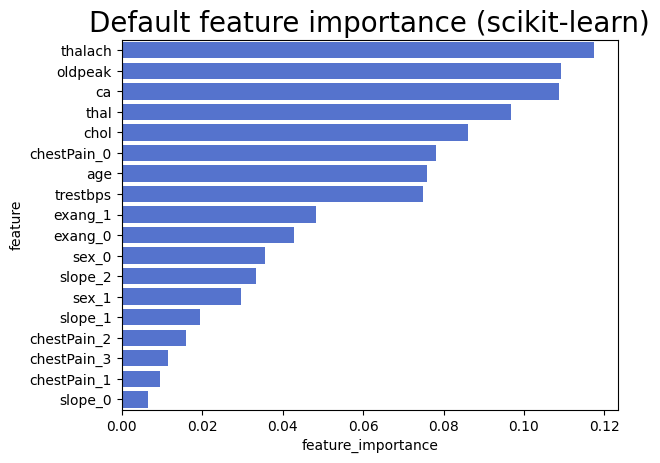

In [35]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

**Insight:**

Information was obtained that the thalach, oldpeak, and ca features were the 3 most important features in classifying whether a patient had a heart disease or not, these three features had a value above 0.1. In addition, the cp feature with category 0 (chestPain_0) is the most important category-type feature compared to other category features in classifying patient status. Whereas in other categories, the cp feature does not really give importance to the target variables (chestPain_2, chestPain_3, and chestPain_1). The slope feature in category 0 (slope_0) is the feature with the lowest contribution to the target feature.

## Baseline Model Comparison
Let's take a look one more time the summary of the baseline model performance.

In [36]:
print("Performance Comparison of Decison Tree dan Random Forest:")
print("Accuracy Decision Tree =",m1a)
print("Recall Decision Tree=",m1r)
print("F1 Decison Tree =",m1f)
print("Accuracy Random Forest =",m2a)
print("Recall Random Forest =",m2r)
print("F1 Random Forest =",m2f)

Performance Comparison of Decison Tree dan Random Forest:
Accuracy Decision Tree = 0.7931034482758621
Recall Decision Tree= 0.8484848484848485
F1 Decison Tree = 0.823529411764706
Accuracy Random Forest = 0.7758620689655172
Recall Random Forest = 0.9393939393939394
F1 Random Forest = 0.8266666666666667


**Insight**

In this case, the focus will be on evaluating the model that minimizes false negatives, so that the performance of the model using **recall** will be compared. Based on the output above, the recall value of the Random Forest method is better than the Decision Tree method.

## Hyperparameter Tuning
To increase the number of evaluation metrics, we will do some hyperparameter tuning for both algorithms.

### Fit Random Forest Model

In [37]:
#Split Data
data3_train, data3_test = train_test_split(data3, test_size=0.2, random_state=1000) 

#define data train
X_train_rf = data3_train.drop(columns=['target'])
y_train_rf = data3_train['target']

#define data test
X_test_rf = data3_test.drop(columns=['target'])
y_test_rf = data3_test['target']

#Fit Model DT
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train_rf,y_train_rf)

#Recall Data Test tanpa Hyperparameter Tuning
y_pred_rf = model_rf.predict(X_test_rf)
recall_rf = recall_score(y_test_rf, y_pred_rf)
print("Recall RF Model without Hyperparameter Tuning = ",recall_rf)

Recall RF Model without Hyperparameter Tuning =  0.9393939393939394


### Hyperparameter Tuning Random Forest Model

In [38]:
hyperparameter_space_rf = { 
"n_estimators": [25,50,100], 
"criterion": ["gini", "entropy"], 
"class_weight": ["balanced","balanced_subsample"],
"min_samples_split": [0.1,0.5],
} 

# Initiate the Grid Search Class
clf_rf = GridSearchCV(model_rf, hyperparameter_space_rf, 
                   scoring = 'recall', cv=5, 
                   n_jobs=-1, refit = True,
                   verbose=2)

# Run the Grid Search CV
clf_rf.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_split': [0.1, 0.5],
                         'n_estimators': [25, 50, 100]},
             scoring='recall', verbose=2)

### Decide the best hyperparameter for Random Forest Model

In [39]:
print("Best Hyperparameter RF:\n", clf_rf.best_params_,clf_rf.best_score_)

Best Hyperparameter RF:
 {'class_weight': 'balanced', 'criterion': 'entropy', 'min_samples_split': 0.5, 'n_estimators': 25} 0.8720000000000001


### RF Model Evaluation After Hyperparameter Tuning

In [40]:
print("Recall RF Model Evaluation After Hyperparameter Tuning = ", clf_rf.score(X_test_rf,y_test_rf))

Recall RF Model Evaluation After Hyperparameter Tuning =  0.9696969696969697


In [41]:
# classification report
model2_tuned = clf_rf.predict(X_test_rf)
print(classification_report(y_test_rf,model2_tuned))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79        25
           1       0.80      0.97      0.88        33

    accuracy                           0.84        58
   macro avg       0.87      0.82      0.83        58
weighted avg       0.86      0.84      0.84        58



**Inisght:**

After hyperparameter tuning, the Random Forest model experienced an increase in the recall value from 0.939 to 0.969.

### Fit Decison Tree Model

In [42]:
#Split Data
data3_train, data3_test = train_test_split(data3, test_size=0.2, random_state=1000) 

#define data train
X_train_dt = data3_train.drop(columns=['target'])
y_train_dt = data3_train['target']

#define data test
X_test_dt = data3_test.drop(columns=['target'])
y_test_dt = data3_test['target']

#Fit Model DT
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train_dt,y_train_dt)

#Recall Data Test without Hyperparameter Tuning
y_pred_dt = model_dt.predict(X_test_dt)
recall_dt = recall_score(y_test_dt, y_pred_dt)
print("Recall DT Model without Hyperparameter Tuning = ",recall_dt)

Recall DT Model without Hyperparameter Tuning =  0.8484848484848485


### Hyperparameter Tuning Decision Tree Model

In [43]:
#define hyperparameters
hyperparameter_space_dt = { 
"max_depth": [1,5,10,15,20], 
"max_leaf_nodes": [10,20,30], 
} 

# Initiate the Grid Search Class
clf_dt = GridSearchCV(model_dt, hyperparameter_space_dt, 
                   scoring = 'recall', cv=5, 
                   n_jobs=-1, refit = True,
                   verbose=2)

# Run the Grid Search CV
clf_dt.fit(X_train_dt, y_train_dt)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_leaf_nodes': [10, 20, 30]},
             scoring='recall', verbose=2)

### Decide the best hyperparameter for Decision Tree Model

In [44]:
print("Best Hyperparameter DT:\n", clf_dt.best_params_,clf_dt.best_score_)

Best Hyperparameter DT:
 {'max_depth': 10, 'max_leaf_nodes': 20} 0.8480000000000001


### DT Model Evaluation After Hyperparameter Tuning

In [45]:
print("Recall DT Model After Hyperparameter Tuning = ", clf_dt.score(X_test_dt,y_test_dt))

Recall DT Model After Hyperparameter Tuning =  0.9393939393939394


In [46]:
model1_tuned = clf_dt.predict(X_test_dt)
print(classification_report(y_test_dt,model1_tuned))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.84      0.94      0.89        33

    accuracy                           0.86        58
   macro avg       0.87      0.85      0.86        58
weighted avg       0.87      0.86      0.86        58



**Inisght:**

After hyperparameter tuning, the Random Forest model experienced an increase in the recall value from the original 0.848 to 0.939.

## ROC-AUC Curve Evaluation

### Calculate AUC for each Model

In [47]:
# Calculate the AUC-ROC scores
auc_rf = roc_auc_score(y_test_rf, y_pred_rf)
auc_dt = roc_auc_score(y_test_dt, y_pred_dt)

print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")

AUC-ROC for Random Forest: 0.7496969696969698
AUC-ROC for Decision Tree: 0.7842424242424243


### Plot ROC for each Model

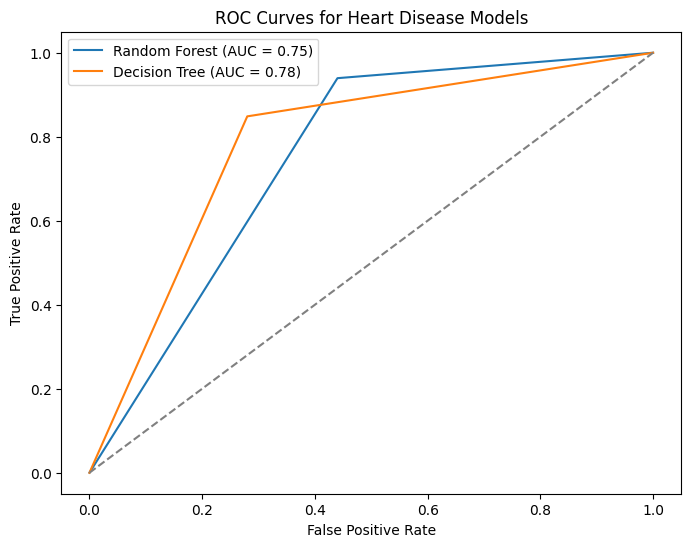

In [48]:
def plot_roc_curves(y_test_rf, y_pred_rf, y_pred_dt):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test_rf, y_pred_dt)

    # Plot ROC curves
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test_rf, y_pred_rf, y_pred_dt)

**Inisght:**

Based on the ROC curve, it can be seen that the Decision Tree model is better because it has a larger AUC value than the Random Forest model AUC.

## Best Model Selection

Selection of the best model is based on the recall value. This is because the purpose of this case classification is to minimize false negatives. In other words, the output of this case classification does not want to get results in the form of classifying the patient as not having heart disease even though the patient actually has heart disease.

In [49]:
print("Comparison of Recall for Each Model:")
print("Random Forest without Hyperparameter Tuning = ", recall_rf)
print("Random Forest after Hyperparameter Tuning = ", clf_rf.score(X_test_rf,y_test_rf))
print("Decision Tree without Hyperparameter Tuning = ", recall_dt)
print("Decison Tree after Hyperparameter Tuning = ", clf_dt.score(X_test_dt,y_test_dt))

Comparison of Recall for Each Model:
Random Forest without Hyperparameter Tuning =  0.9393939393939394
Random Forest after Hyperparameter Tuning =  0.9696969696969697
Decision Tree without Hyperparameter Tuning =  0.8484848484848485
Decison Tree after Hyperparameter Tuning =  0.9393939393939394


**Conclusion:**

The Random Forest model with hyperparameter tuning was still chosen because it has a better recall value (97%) than the Decision Tree (93%), even though the Decision Tree model has a larger AUC value.